In [1]:
# Install required packages (if not already installed)
install.packages(c("tidyverse", "janitor", "lubridate", "ggplot2", "scales"))

# Load libraries
library(tidyverse)
library(janitor)
library(lubridate)
library(ggplot2)
library(scales)


Installing packages into 'C:/Users/yasir/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked
package 'janitor' successfully unpacked and MD5 sums checked
package 'lubridate' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yasir\AppData\Local\Temp\Rtmpyi9yhW\downloaded_packages


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test



Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




In [3]:
library(readxl)

In [4]:
# Load the Excel file
data <- read_excel("Online Retail.xlsx")

# View the first few rows of the dataset
head(data)

# View dataset structure
str(data)


InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


tibble [541,909 × 8] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:541909] "536365" "536365" "536365" "536365" ...
 $ StockCode  : chr [1:541909] "85123A" "71053" "84406B" "84029G" ...
 $ Description: chr [1:541909] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:541909] 6 6 8 6 6 2 6 6 6 32 ...
 $ InvoiceDate: POSIXct[1:541909], format: "2010-12-01 08:26:00" "2010-12-01 08:26:00" ...
 $ UnitPrice  : num [1:541909] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID : num [1:541909] 17850 17850 17850 17850 17850 ...
 $ Country    : chr [1:541909] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


In [5]:
# Load libraries
library(tidyverse)
library(janitor)
library(lubridate)

In [6]:
data <- clean_names(data)

In [11]:
head(data)

invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_revenue
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>,<dbl>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30


In [8]:
data <- data %>%
  drop_na(customer_id)

In [10]:
# Create a new column for total revenue (Quantity * UnitPrice)
data <- data %>%
  mutate(total_revenue = quantity * unit_price)

In [12]:
# Ensure InvoiceDate is in POSIXct format for time-based analysis
data <- data %>%
  mutate(invoice_date = as_datetime(invoice_date))

In [14]:
# Save the cleaned dataset as a CSV file for further analysis
write_csv(data, "cleaned_data.csv")


In [15]:
# Summary of Cleaned Data
cat("\nSummary of Cleaned Data:\n")
print(summary(data))


Summary of Cleaned Data:
  invoice_no         stock_code        description           quantity        
 Length:406829      Length:406829      Length:406829      Min.   :-80995.00  
 Class :character   Class :character   Class :character   1st Qu.:     2.00  
 Mode  :character   Mode  :character   Mode  :character   Median :     5.00  
                                                          Mean   :    12.06  
                                                          3rd Qu.:    12.00  
                                                          Max.   : 80995.00  
  invoice_date                      unit_price        customer_id   
 Min.   :2010-12-01 08:26:00.00   Min.   :    0.00   Min.   :12346  
 1st Qu.:2011-04-06 15:02:00.00   1st Qu.:    1.25   1st Qu.:13953  
 Median :2011-07-31 11:48:00.00   Median :    1.95   Median :15152  
 Mean   :2011-07-10 16:30:57.88   Mean   :    3.46   Mean   :15288  
 3rd Qu.:2011-10-20 13:06:00.00   3rd Qu.:    3.75   3rd Qu.:16791  
 Max.   :2011-

In [16]:
# Remove extreme outliers in Quantity and UnitPrice
data <- data %>%
  filter(quantity > 0, quantity < 1000,  # Cap quantity at a reasonable limit
         unit_price > 0, unit_price < 1000)  # Cap unit price at a reasonable limit

# Remove transactions with negative total revenue
data <- data %>%
  filter(total_revenue >= 0)

# Summary after handling outliers
cat("\nSummary After Handling Outliers:\n")
print(summary(data))



Summary After Handling Outliers:
  invoice_no         stock_code        description           quantity     
 Length:397748      Length:397748      Length:397748      Min.   :  1.00  
 Class :character   Class :character   Class :character   1st Qu.:  2.00  
 Mode  :character   Mode  :character   Mode  :character   Median :  6.00  
                                                          Mean   : 12.15  
                                                          3rd Qu.: 12.00  
                                                          Max.   :992.00  
  invoice_date                      unit_price       customer_id   
 Min.   :2010-12-01 08:26:00.00   Min.   :  0.001   Min.   :12347  
 1st Qu.:2011-04-07 11:12:00.00   1st Qu.:  1.250   1st Qu.:13969  
 Median :2011-07-31 14:39:00.00   Median :  1.950   Median :15159  
 Mean   :2011-07-10 23:53:46.24   Mean   :  2.990   Mean   :15294  
 3rd Qu.:2011-10-20 14:33:00.00   3rd Qu.:  3.750   3rd Qu.:16795  
 Max.   :2011-12-09 12:50:00.00  

[1] "C"

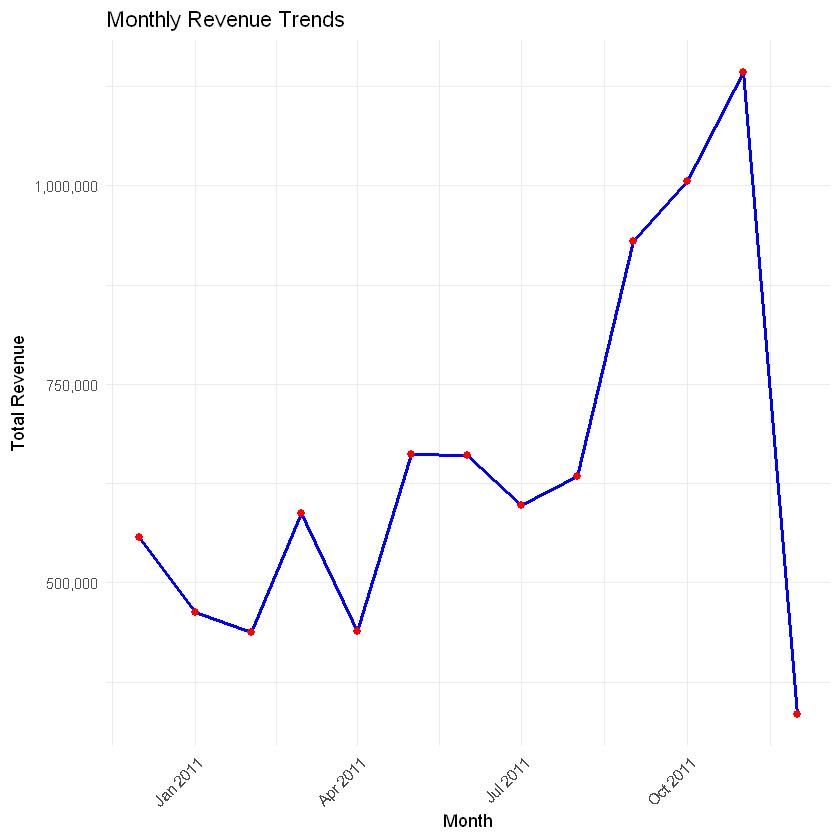

In [23]:
# Ensure locale is set to English
Sys.setlocale("LC_TIME", "C")

# Plot Monthly Revenue Trends
ggplot(monthly_revenue, aes(x = month, y = total_revenue)) +
  geom_line(color = "blue", size = 1) +  # Reduce line thickness
  geom_point(color = "red", size = 2) +  # Add red points for clarity
  scale_y_continuous(labels = scales::comma) +  # Format Y-axis with commas
  labs(title = "Monthly Revenue Trends",
       x = "Month",
       y = "Total Revenue") +
  theme_minimal() +  # Cleaner theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate X-axis labels



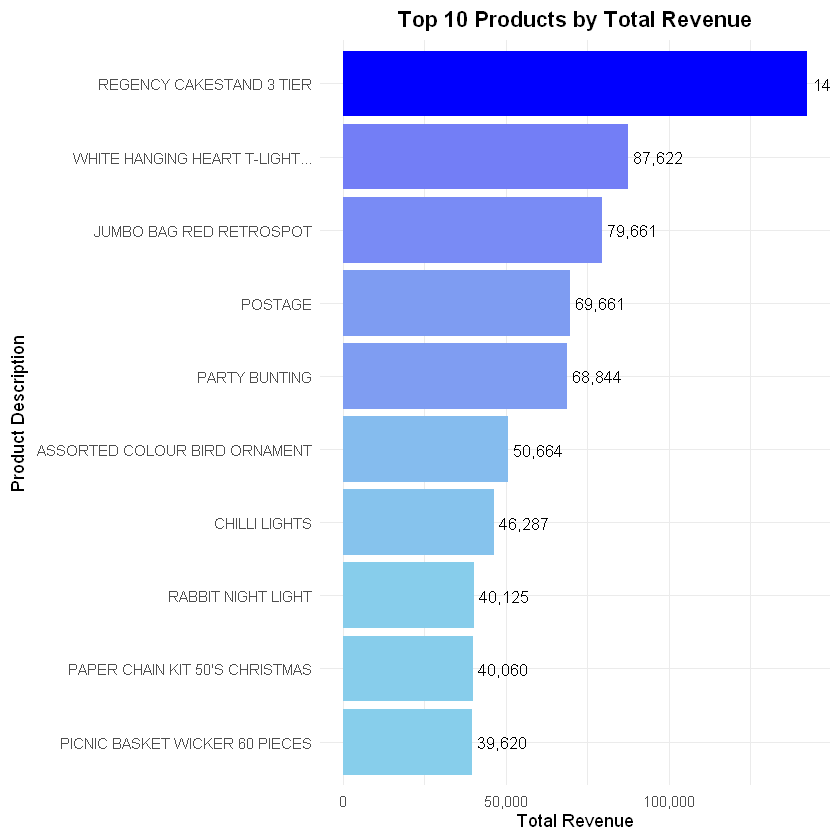

In [24]:
library(ggplot2)
library(scales)  # For formatting Y-axis labels
library(stringr) # For shortening product descriptions

# Top 10 products by total revenue
top_products <- data %>%
  group_by(description) %>%
  summarize(total_revenue = sum(total_revenue)) %>%
  arrange(desc(total_revenue)) %>%
  slice_head(n = 10) %>%
  mutate(short_description = str_trunc(description, 30))  # Shorten descriptions

# Plot top products
ggplot(top_products, aes(x = reorder(short_description, total_revenue), y = total_revenue)) +
  geom_bar(stat = "identity", aes(fill = total_revenue), show.legend = FALSE) +
  geom_text(aes(label = scales::comma(total_revenue)), 
            hjust = -0.1, size = 3.5, color = "black") +  # Add data labels
  scale_fill_gradient(low = "skyblue", high = "blue") +  # Gradient fill
  scale_y_continuous(labels = scales::comma) +  # Format Y-axis with commas
  coord_flip() +  # Flip for horizontal bars
  labs(title = "Top 10 Products by Total Revenue",
       x = "Product Description",
       y = "Total Revenue") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),  # Centered and bold title
        axis.text.y = element_text(size = 9))  # Adjust Y-axis text size



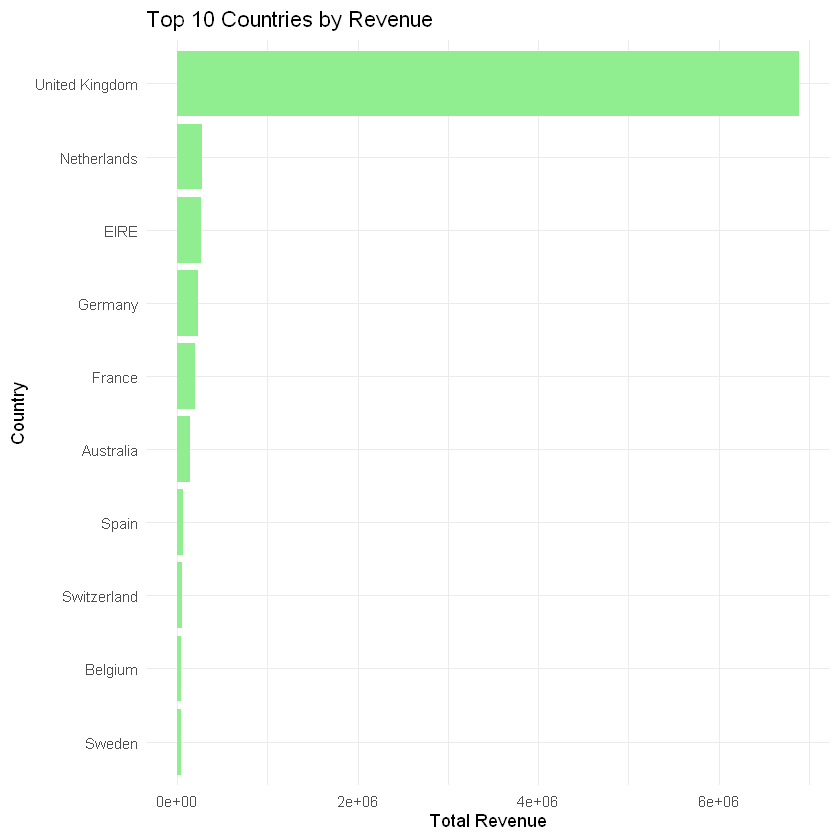

In [20]:
# Total revenue by country
country_revenue <- data %>%
  group_by(country) %>%
  summarize(total_revenue = sum(total_revenue)) %>%
  arrange(desc(total_revenue))

# Plot revenue by country
ggplot(country_revenue[1:10,], aes(x = reorder(country, total_revenue), y = total_revenue)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  coord_flip() +
  labs(title = "Top 10 Countries by Revenue", x = "Country", y = "Total Revenue") +
  theme_minimal()


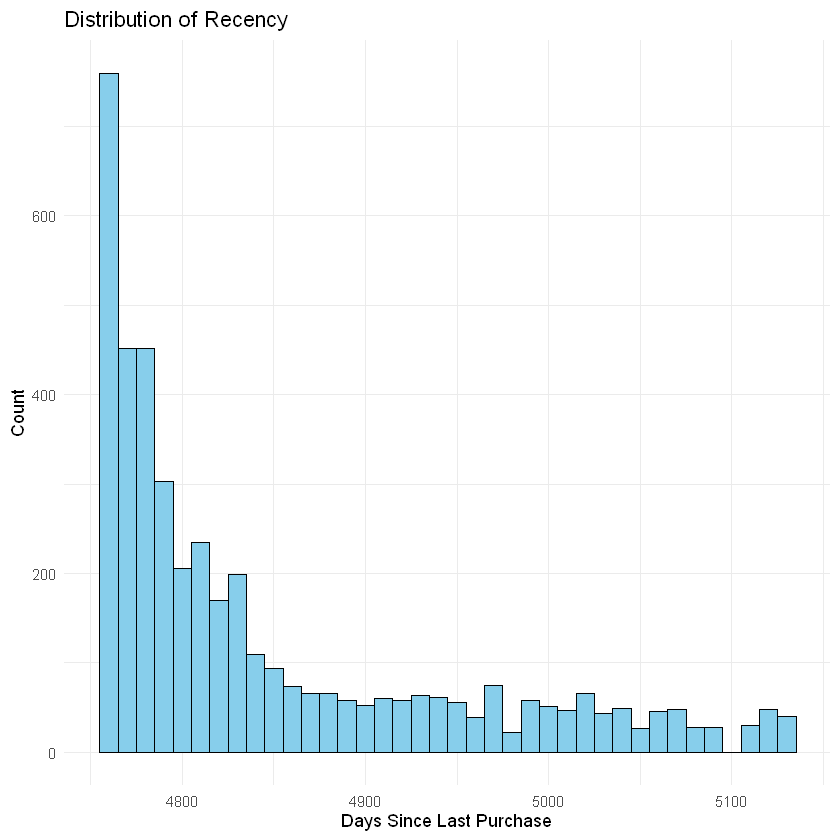

In [26]:
# RFM Analysis
# Ensure invoice_date is a Date object
rfm_data <- data %>%
  mutate(invoice_date = as.Date(invoice_date)) %>%  # Convert to Date
  group_by(customer_id) %>%
  summarize(
    recency = as.numeric(Sys.Date() - max(invoice_date)),  # Days since last purchase
    frequency = n_distinct(invoice_no),  # Unique invoices
    monetary = sum(total_revenue)  # Total revenue
  )

# Plot Distribution of RFM Scores
library(ggplot2)

# Plot Recency
# Recency Histogram with appropriate binwidth
ggplot(rfm_data, aes(x = recency)) +
  geom_histogram(binwidth = 10, fill = "skyblue", color = "black") +  # Set binwidth to 10
  labs(title = "Distribution of Recency", x = "Days Since Last Purchase", y = "Count") +
  theme_minimal()


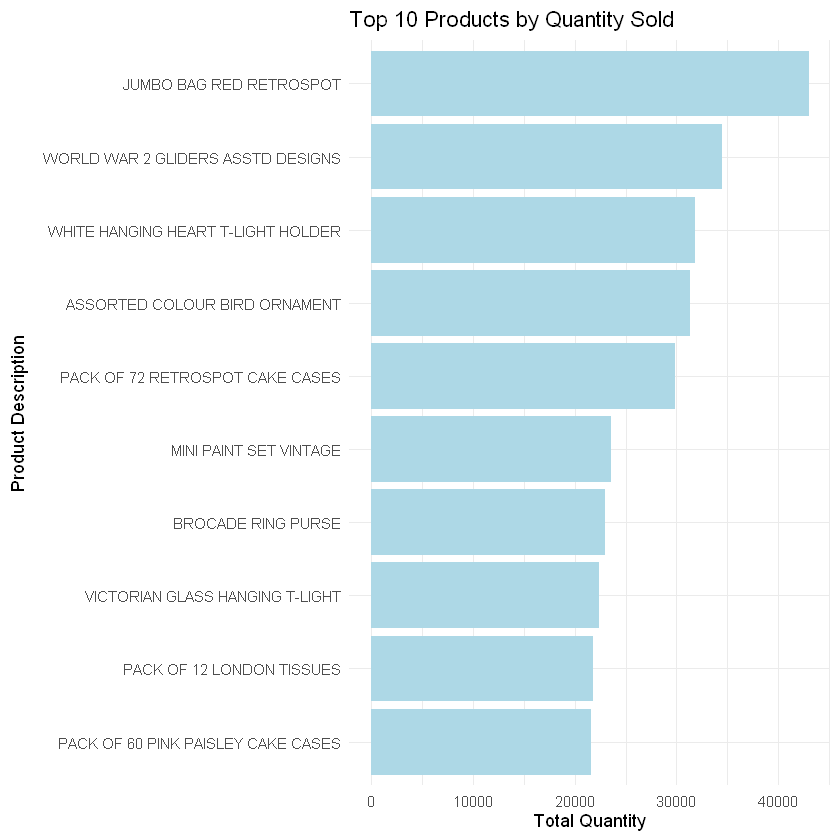

In [27]:
# Top Products by Quantity Sold
top_selling_products <- data %>%
  group_by(description) %>%
  summarize(total_quantity = sum(quantity)) %>%
  arrange(desc(total_quantity)) %>%
  slice_head(n = 10)

# Plot Top Selling Products
ggplot(top_selling_products, aes(x = reorder(description, total_quantity), y = total_quantity)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  coord_flip() +
  labs(title = "Top 10 Products by Quantity Sold", x = "Product Description", y = "Total Quantity") +
  theme_minimal()


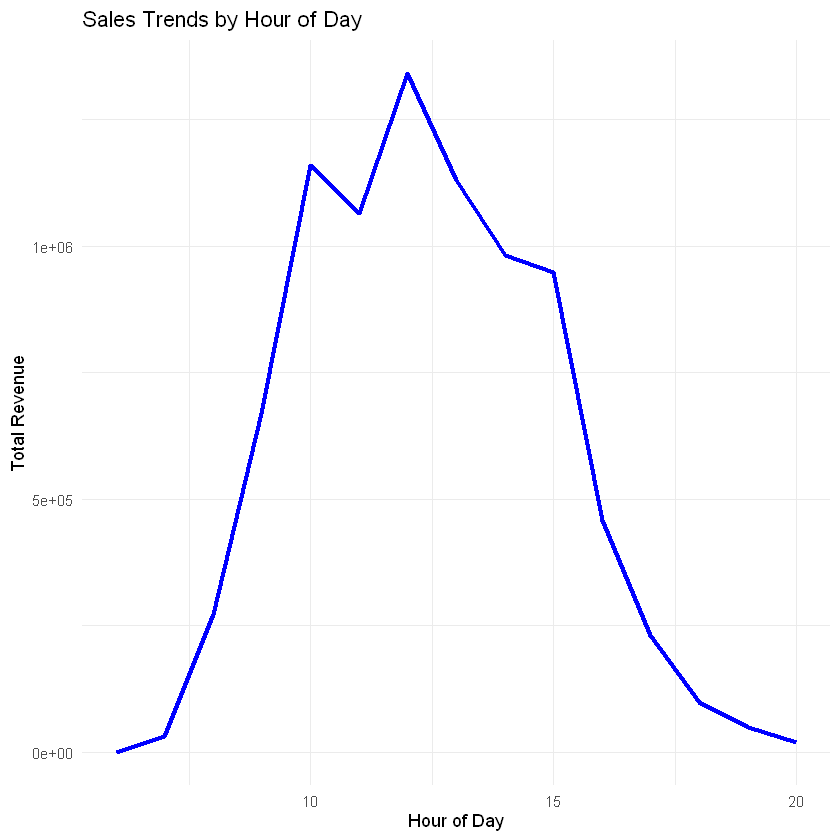

In [28]:
# Add Day of Week and Hour Columns
data <- data %>%
  mutate(day_of_week = weekdays(invoice_date),
         hour_of_day = hour(invoice_date))

# Sales by Hour of Day
hourly_sales <- data %>%
  group_by(hour_of_day) %>%
  summarize(total_revenue = sum(total_revenue))

# Plot Hourly Sales Trends
ggplot(hourly_sales, aes(x = hour_of_day, y = total_revenue)) +
  geom_line(color = "blue", size = 1.2) +
  labs(title = "Sales Trends by Hour of Day", x = "Hour of Day", y = "Total Revenue") +
  theme_minimal()


In [30]:
install.packages("maps")

Installing package into 'C:/Users/yasir/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'maps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yasir\AppData\Local\Temp\Rtmpyi9yhW\downloaded_packages



Attaching package: 'maps'


The following object is masked from 'package:purrr':

    map




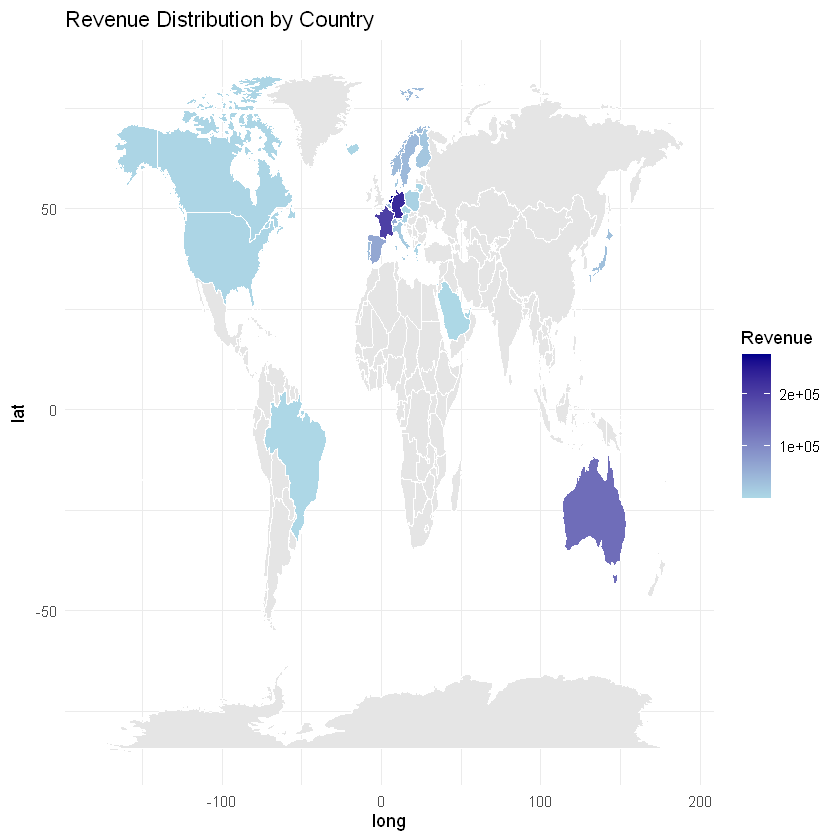

In [31]:
# Install and load necessary libraries
library(ggplot2)
library(maps)
library(dplyr)

# Summarize revenue by country
country_revenue <- data %>%
  group_by(country) %>%
  summarize(total_revenue = sum(total_revenue))

# Load world map data
world_map <- map_data("world")

# Merge revenue data with map data
map_data <- left_join(world_map, country_revenue, by = c("region" = "country"))

# Plot the heatmap
ggplot(map_data, aes(x = long, y = lat, group = group, fill = total_revenue)) +
  geom_polygon(color = "white") +
  scale_fill_continuous(low = "lightblue", high = "darkblue", na.value = "gray90", name = "Revenue") +
  labs(title = "Revenue Distribution by Country") +
  theme_minimal()
